<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Project Case Scenario

You are a Data Scientist with a housing agency in Boston, MA. You have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management would like to gain insight into the following:

1. **Is there a significant difference in the median value of houses bounded by the Charles river or not?**

2. **Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?**

3. **Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?**

4. **What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?**

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insights given the questions they are asking. In your graphs, include an explanation of each statistic.



# Overview of Project Tasks

## Project Tasks:

1. **Task 1**: Familiarize yourself with the dataset

2. **Task 2**: Generate basic statistics and visualizations for upper management.

3. **Task 3**: Use the appropriate tests to answer the questions provided.

4. **Task 4**: Share your Jupyter Notebook.


#### Import the required libraries we need for the lab.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [14]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 1: Become Familiar with the Dataset

The following describes the dataset variables:

- **CRIM**: Per capita crime rate by town  
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.  
- **INDUS**: Proportion of non-retail business acres per town  
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- **NOX**: Nitric oxides concentration (parts per 10 million)  
- **RM**: Average number of rooms per dwelling  
- **AGE**: Proportion of owner-occupied units built prior to 1940  
- **DIS**: Weighted distances to five Boston employment centres  
- **RAD**: Index of accessibility to radial highways  
- **TAX**: Full-value property-tax rate per $10,000  
- **PTRATIO**: Pupil-teacher ratio by town  
- **LSTAT**: % lower status of the population  
- **MEDV**: Median value of owner-occupied homes in $1000's  



In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [10]:
boston_df.shape

(506, 14)

In [15]:
#drop unwanted columns
boston_df.drop(['Unnamed: 0'], axis=1, inplace=True)
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels.

## Generate the following and explain your findings:

1. **Boxplot**:  
   - For the "Median value of owner-occupied homes" (MEDV), provide a boxplot.

2. **Bar Plot**:  
   - Provide a bar plot for the Charles River variable (CHAS).

3. **Boxplot**:  
   - For the MEDV variable vs. the AGE variable.  
   - Discretize the AGE variable into three groups:  
     - 35 years and younger  
     - Between 35 and 70 years  
     - 70 years and older  

4. **Scatter Plot**:  
   - Show the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).  
   - What can you say about the relationship?

5. **Histogram**:  
   - Create a histogram for the pupil-to-teacher ratio (PTRATIO) variable.


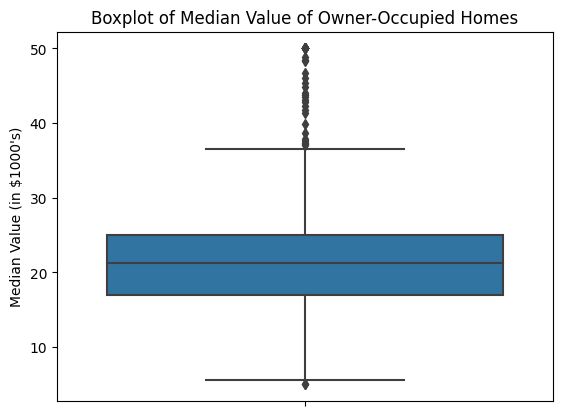

In [16]:
# Boxplot for the "Median value of owner-occupied homes" (MEDV)
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value (in $1000\'s)')
pyplot.show()

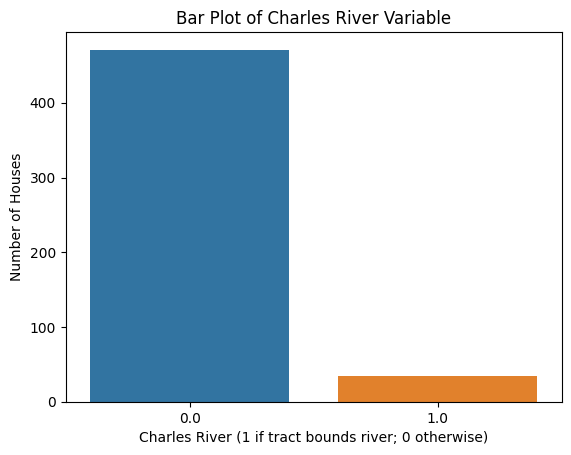

In [17]:
# Bar plot for the Charles River variable (CHAS)
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River (1 if tract bounds river; 0 otherwise)')
pyplot.ylabel('Number of Houses')
pyplot.show()

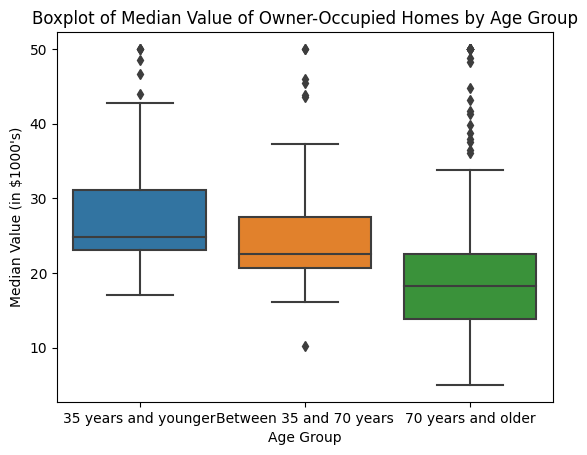

In [18]:
# Discretize the AGE variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

# Create the boxplot
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value (in $1000\'s)')
pyplot.show()

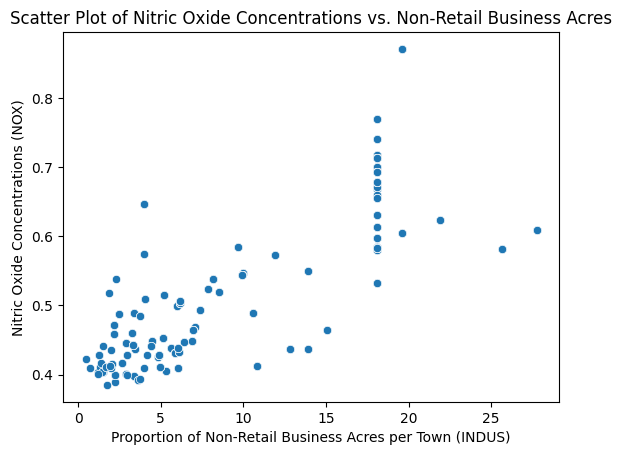

In [19]:
# Scatter plot for the relationship between NOX and INDUS
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs. Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.show()

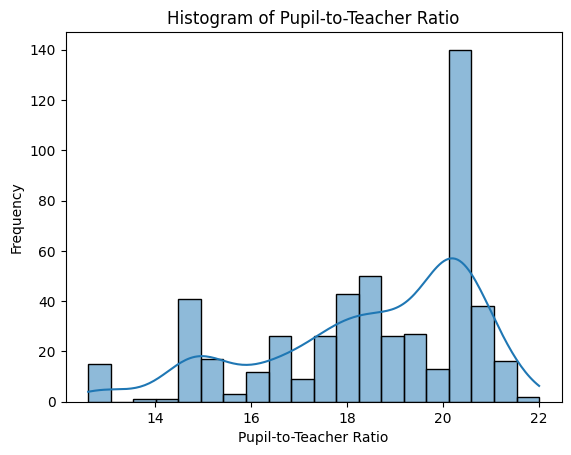

In [20]:
# Create a histogram for the pupil-to-teacher ratio (PTRATIO) variable
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of Pupil-to-Teacher Ratio')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

# Task 3: Use the Appropriate Tests to Answer the Questions Provided

For each of the following questions:

1. **Is there a significant difference in the median value of houses bounded by the Charles river or not?**  
   - Test: T-test for independent samples  

2. **Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?**  
   - Test: ANOVA  

3. **Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)?**  
   - Test: Pearson Correlation  

4. **What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV)?**  
   - Test: Regression analysis  

## Be sure to:

- **State your hypothesis.**  
- Use **α = 0.05**.  
- Perform the test statistics.  
- State the conclusion from the test.


In [21]:
# Separate the data into two groups based on the CHAS variable
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform the T-test
t_stat, p_value = scipy.stats.ttest_ind(chas_0, chas_1)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the median value of houses bounded by the Charles river.")
else:
    print("There is no significant difference in the median value of houses bounded by the Charles river.")

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in the median value of houses bounded by the Charles river.


In [22]:
# Perform ANOVA
anova_model = ols('MEDV ~ AGE_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Print the ANOVA table
print(anova_table)

# Conclusion
p_value_anova = anova_table['PR(>F)'][0]
if p_value_anova < alpha:
    print("There is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("There is no significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.")

                 sum_sq     df         F        PR(>F)
AGE_Group   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN
There is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.


In [23]:
# Perform Pearson Correlation test
correlation, p_value_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value_corr}")

# Conclusion
if p_value_corr < alpha:
    print("There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")

Pearson Correlation Coefficient: 0.763651446920915
P-value: 7.913361061241532e-98
There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


In [24]:
# Perform regression analysis
regression_model = ols('MEDV ~ DIS', data=boston_df).fit()
regression_summary = regression_model.summary()

# Print the regression summary
print(regression_summary)

# Extract the p-value and the coefficient for DIS
p_value_regression = regression_model.pvalues['DIS']
coefficient_DIS = regression_model.params['DIS']

# Conclusion
print(f"P-value: {p_value_regression}")
print(f"Coefficient for DIS: {coefficient_DIS}")

if p_value_regression < alpha:
    print("There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
else:
    print("There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        19:26:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0